#🛠️ Preparação dos Dados

## Extração do Arquivo Tratado

In [84]:
# Importa a biblioteca pandas, usada para análise e manipulação de dados
import pandas as pd

In [85]:
# Lê o arquivo CSV 'dados_tratados.csv' e armazena em um DataFrame chamado 'dados'
dados = pd.read_csv('dados_tratados.csv')

In [86]:
# Mostra as 5 primeiras linhas do DataFrame para inspecionar rapidamente os dados
dados.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Assinatura_Multipla_Linha,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,TV_Cabo,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Gasto_Diario,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,0,feminino,0,1,1,9,1,0,dsl,...,0,1,1,0,1 ano,1,cheque,2.20,65.6,593.30
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,dsl,...,0,0,0,1,mensal,0,cheque,2.01,59.9,542.40
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,fibra ótica,...,1,0,0,0,mensal,1,cheque eletrônico,2.34,73.9,280.85
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,fibra ótica,...,1,0,1,1,mensal,1,cheque eletrônico,3.17,98.0,1237.85
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0,fibra ótica,...,0,1,1,0,mensal,1,cheque,2.97,83.9,267.40


## Remoção de Colunas Irrelevantes

In [87]:
# Exibe informações gerais sobre o DataFrame: número de linhas, colunas, tipos de dados e valores não nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Cliente                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   Genero                     7043 non-null   object 
 3   Idoso                      7043 non-null   int64  
 4   Parceiro                   7043 non-null   int64  
 5   Dependentes                7043 non-null   int64  
 6   Meses_Contrato             7043 non-null   int64  
 7   Servico_Telefonico         7043 non-null   int64  
 8   Assinatura_Multipla_Linha  7043 non-null   int64  
 9   Servico_Internet           7043 non-null   object 
 10  Seguranca_Online           7043 non-null   int64  
 11  Backup_Online              7043 non-null   int64  
 12  Protecao_Dispositivo       7043 non-null   int64  
 13  Suporte_Tecnico            7043 non-null   int64

In [88]:
# Remove a coluna 'ID_Cliente', ele é apenas um identificador e não é relevante para a análise
dados = dados.drop(columns='ID_Cliente')

## Normalização ou Padronização

Avalie a necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados. Modelos baseados em distância, como **KNN, SVM, Regressão Logística e Redes Neurais**, requerem esse pré-processamento. Já modelos baseados em **árvore, como Decision Tree, Random Forest e XGBoost**, não são sensíveis à escala dos dados.

In [89]:
# Mostra a quantidade de valores nulos (NaN) em cada coluna
dados.isnull().sum()

,0
Churn,0
Genero,0
Idoso,0
Parceiro,0
Dependentes,0
Meses_Contrato,0
Servico_Telefonico,0
Assinatura_Multipla_Linha,0
Servico_Internet,0
Seguranca_Online,0


In [90]:
# Exibe especificamente a quantidade de valores nulos nas colunas 'Gasto_Diario' e 'Gasto_Total'
print(dados[['Gasto_Diario', 'Gasto_Total']].isnull().sum())

Gasto_Diario    11
Gasto_Total     11
dtype: int64


In [91]:
# Remove todas as linhas que possuem valores nulos em 'Gasto_Diario' ou 'Gasto_Total'
dados = dados.dropna(subset=['Gasto_Diario', 'Gasto_Total'])

In [92]:
# Mostra a quantidade de valores nulos (NaN) em cada coluna
dados.isnull().sum()

,0
Churn,0
Genero,0
Idoso,0
Parceiro,0
Dependentes,0
Meses_Contrato,0
Servico_Telefonico,0
Assinatura_Multipla_Linha,0
Servico_Internet,0
Seguranca_Online,0


A **normalização Min-Max**, que transforma os valores para o intervalo **\[0, 1]**. Isso ajuda a garantir que todas as variáveis numéricas contribuam de forma equilibrada para o modelo.

In [93]:
# Importa a classe MinMaxScaler da biblioteca scikit-learn.
# Ela é usada para normalizar valores numéricos em um intervalo específico (por padrão, entre 0 e 1).
from sklearn.preprocessing import MinMaxScaler

In [94]:
# Exibe os nomes de todas as colunas presentes no DataFrame 'dados'.
dados.columns

Index(['Churn', 'Genero', 'Idoso', 'Parceiro', 'Dependentes', 'Meses_Contrato',
       'Servico_Telefonico', 'Assinatura_Multipla_Linha', 'Servico_Internet',
       'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
       'Suporte_Tecnico', 'TV_Cabo', 'Streaming_Filmes', 'Tipo_Contrato',
       'Fatura_Online', 'Forma_Pagamento', 'Gasto_Diario', 'Gasto_Mensal',
       'Gasto_Total'],
      dtype='object')

In [95]:
# Cria uma lista com os nomes das colunas numéricas que serão normalizadas.
colunas_numericas = ['Meses_Contrato','Gasto_Diario','Gasto_Mensal','Gasto_Total']

In [96]:
# Cria um objeto "scaler" da classe MinMaxScaler, configurado com o intervalo padrão (0 a 1).
scaler = MinMaxScaler()

In [97]:
# Aplica a normalização Min-Max às colunas numéricas selecionadas.
# O método fit_transform() primeiro "aprende" os valores mínimo e máximo de cada coluna (fit)
# e depois transforma os dados para ficarem no intervalo [0, 1] (transform).
# O resultado substitui os valores originais no DataFrame.
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

In [98]:
# Exibe as 5 primeiras linhas do DataFrame já com os valores normalizados.
dados.head()

,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Assinatura_Multipla_Linha,Servico_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,TV_Cabo,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Gasto_Diario,Gasto_Mensal,Gasto_Total
0,0,feminino,0,1,1,0.112676,1,0,dsl,0,...,0,1,1,0,1 ano,1,cheque,0.484680,0.471144,0.066294
1,0,masculino,0,0,0,0.112676,1,1,dsl,0,...,0,0,0,1,mensal,0,cheque,0.431755,0.414428,0.060420
2,1,masculino,0,0,0,0.042254,1,0,fibra ótica,0,...,1,0,0,0,mensal,1,cheque eletrônico,0.523677,0.553731,0.030239
3,1,masculino,1,1,0,0.169014,1,0,fibra ótica,0,...,1,0,1,1,mensal,1,cheque eletrônico,0.754875,0.793532,0.140670
4,1,feminino,1,1,0,0.028169,1,0,fibra ótica,0,...,0,1,1,0,mensal,1,cheque,0.699164,0.653234,0.028687


## Encoding

In [99]:
# Importa funções do scikit-learn:
# - make_column_transformer: permite aplicar transformações diferentes em colunas específicas de um DataFrame.
# - OneHotEncoder: converte variáveis categóricas em variáveis dummies (0/1), criando uma coluna para cada categoria.
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [100]:
# Cria uma cópia do DataFrame original 'dados' para não alterar os dados originais.
dados_encoded = dados.copy()

In [101]:
# Armazena todos os nomes das colunas do DataFrame na variável 'colunas'.
colunas = dados_encoded.columns
# Exibe a lista de colunas do DataFrame (útil para conferência).
colunas

Index(['Churn', 'Genero', 'Idoso', 'Parceiro', 'Dependentes', 'Meses_Contrato',
       'Servico_Telefonico', 'Assinatura_Multipla_Linha', 'Servico_Internet',
       'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
       'Suporte_Tecnico', 'TV_Cabo', 'Streaming_Filmes', 'Tipo_Contrato',
       'Fatura_Online', 'Forma_Pagamento', 'Gasto_Diario', 'Gasto_Mensal',
       'Gasto_Total'],
      dtype='object')

In [102]:
# Cria o transformador configurado para aplicar OneHotEncoder nas colunas especificadas.
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),                                   # O parâmetro drop='if_binary' evita criar duas colunas para variáveis binárias (mantém apenas uma).
                                   ['Genero', 'Servico_Internet','Tipo_Contrato','Forma_Pagamento']), # Aplica OneHotEncoder nas colunas categóricas selecionadas.
                                  remainder='passthrough',                                            # Mantém as demais colunas do DataFrame sem alterações.
                                  sparse_threshold=0)                                                 # Garante que o resultado final seja um array denso (não esparso), facilitando a conversão para DataFrame.

In [103]:
# Ajusta (fit) o transformador aos dados e aplica (transform) a codificação.
# O resultado será um array NumPy com as colunas categóricas transformadas e as numéricas preservadas.
dados_encoded = one_hot.fit_transform(dados_encoded)

In [104]:
# Retorna os nomes das novas colunas após a transformação, incluindo as criadas pelo OneHotEncoder.
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__Genero_masculino',
       'onehotencoder__Servico_Internet_dsl',
       'onehotencoder__Servico_Internet_fibra ótica',
       'onehotencoder__Servico_Internet_não',
       'onehotencoder__Tipo_Contrato_1 ano',
       'onehotencoder__Tipo_Contrato_2 anos',
       'onehotencoder__Tipo_Contrato_mensal',
       'onehotencoder__Forma_Pagamento_cartão de crédito',
       'onehotencoder__Forma_Pagamento_cheque',
       'onehotencoder__Forma_Pagamento_cheque eletrônico',
       'onehotencoder__Forma_Pagamento_transferência bancária',
       'remainder__Churn', 'remainder__Idoso', 'remainder__Parceiro',
       'remainder__Dependentes', 'remainder__Meses_Contrato',
       'remainder__Servico_Telefonico',
       'remainder__Assinatura_Multipla_Linha',
       'remainder__Seguranca_Online', 'remainder__Backup_Online',
       'remainder__Protecao_Dispositivo', 'remainder__Suporte_Tecnico',
       'remainder__TV_Cabo', 'remainder__Streaming_Filmes',
       'remainder__Fatura_On

In [105]:
# Converte o array transformado de volta para um DataFrame pandas.
# Define os nomes das colunas como os retornados pelo get_feature_names_out(), para manter o DataFrame legível.
dados_encoded = pd.DataFrame(dados_encoded, columns=one_hot.get_feature_names_out(colunas))

## Verificação da Proporção de Evasão

In [106]:
# Conta a frequência de cada valor na coluna 'Churn'
# O parâmetro normalize=True faz com que o resultado seja dado em proporções (frações entre 0 e 1),
# em vez de contagens absolutas.
proporcao = dados_encoded['remainder__Churn'].value_counts(normalize=True)

# Imprime um título para indicar que os próximos valores estarão em porcentagem.
print("\nProporção (%):")

# Multiplica as proporções por 100 para converter em porcentagem (%).
# Usa a função round(..., 2) para arredondar os valores com 2 casas decimais.
print(round(proporcao * 100, 2))


Proporção (%):
remainder__Churn
0.0    73.42
1.0    26.58
Name: proportion, dtype: float64


## Balanceamento de Classes

In [107]:
# Importa a classe SMOTE (Synthetic Minority Oversampling Technique) da biblioteca imbalanced-learn.
# O SMOTE é uma técnica para balancear classes gerando exemplos sintéticos da classe minoritária.
from imblearn.over_sampling import SMOTE

In [108]:
# Cria a matriz de atributos (X), removendo a coluna alvo 'remainder__Churn' do DataFrame.
# Aqui, ficam apenas as variáveis preditoras.
X = dados_encoded.drop('remainder__Churn', axis=1)

# Define a variável alvo (y), que representa se o cliente evadiu ou não (Churn).
y = dados_encoded['remainder__Churn']

# Cria o objeto SMOTE com os parâmetros padrão.
# Ele será usado para gerar novos registros sintéticos da classe minoritária.
oversample = SMOTE()

# Aplica o SMOTE:
# - fit_resample ajusta o algoritmo aos dados (fit) e depois gera um novo conjunto balanceado (resample).
# - Retorna X_balanced (atributos balanceados) e y_balanced (alvo balanceado).
X_balanced, y_balanced = oversample.fit_resample(X, y)

# Mostra a quantidade de registros no DataFrame original (antes do balanceamento).
print("Registros antes do SMOTE:", dados_encoded.shape[0])

# Mostra a quantidade de registros após aplicar o SMOTE (número maior, pois foram criados exemplos sintéticos).
print("Registros (X) após SMOTE:", X_balanced.shape[0])
print("Registros (y) após SMOTE:", y_balanced.shape[0])

# Conta quantos registros existem em cada classe após o balanceamento.
# O parâmetro normalize=True retorna proporções (0 a 1).
# Multiplica por 100 para converter em porcentagem e arredonda para 2 casas decimais.
# Assim, podemos verificar que as classes estão balanceadas (em geral, ~50% para cada).
print("\nDistribuição da proporção (%) após SMOTE:")
print(round(y_balanced.value_counts(normalize=True) * 100,2))

Registros antes do SMOTE: 7032
Registros (X) após SMOTE: 10326
Registros (y) após SMOTE: 10326

Distribuição da proporção (%) após SMOTE:
remainder__Churn
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


#🎯 Correlação e Seleção de Variáveis

## Análise de Correlação

In [109]:
# Calcula a matriz de correlação entre todas as variáveis numéricas do DataFrame 'dados_encoded'.
# O resultado é um DataFrame em que cada célula mostra a correlação de Pearson entre duas variáveis.
corr = dados_encoded.corr()

In [110]:
# Exibe a correlação de cada variável do DataFrame em relação à variável alvo 'remainder__Churn'.
# Isso ajuda a identificar quais atributos estão mais relacionados com a evasão (churn).
corr['remainder__Churn']

,remainder__Churn
onehotencoder__Genero_masculino,-0.008545
onehotencoder__Servico_Internet_dsl,-0.124141
onehotencoder__Servico_Internet_fibra ótica,0.307463
onehotencoder__Servico_Internet_não,-0.227578
onehotencoder__Tipo_Contrato_1 ano,-0.178225
onehotencoder__Tipo_Contrato_2 anos,-0.301552
onehotencoder__Tipo_Contrato_mensal,0.404565
onehotencoder__Forma_Pagamento_cartão de crédito,-0.134687
onehotencoder__Forma_Pagamento_cheque,-0.090773
onehotencoder__Forma_Pagamento_cheque eletrônico,0.301455


In [111]:
# Importa as bibliotecas necessárias:
# - numpy para operações numéricas.
# - matplotlib.pyplot para criação de gráficos.
# - seaborn para gráficos estatísticos mais sofisticados.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

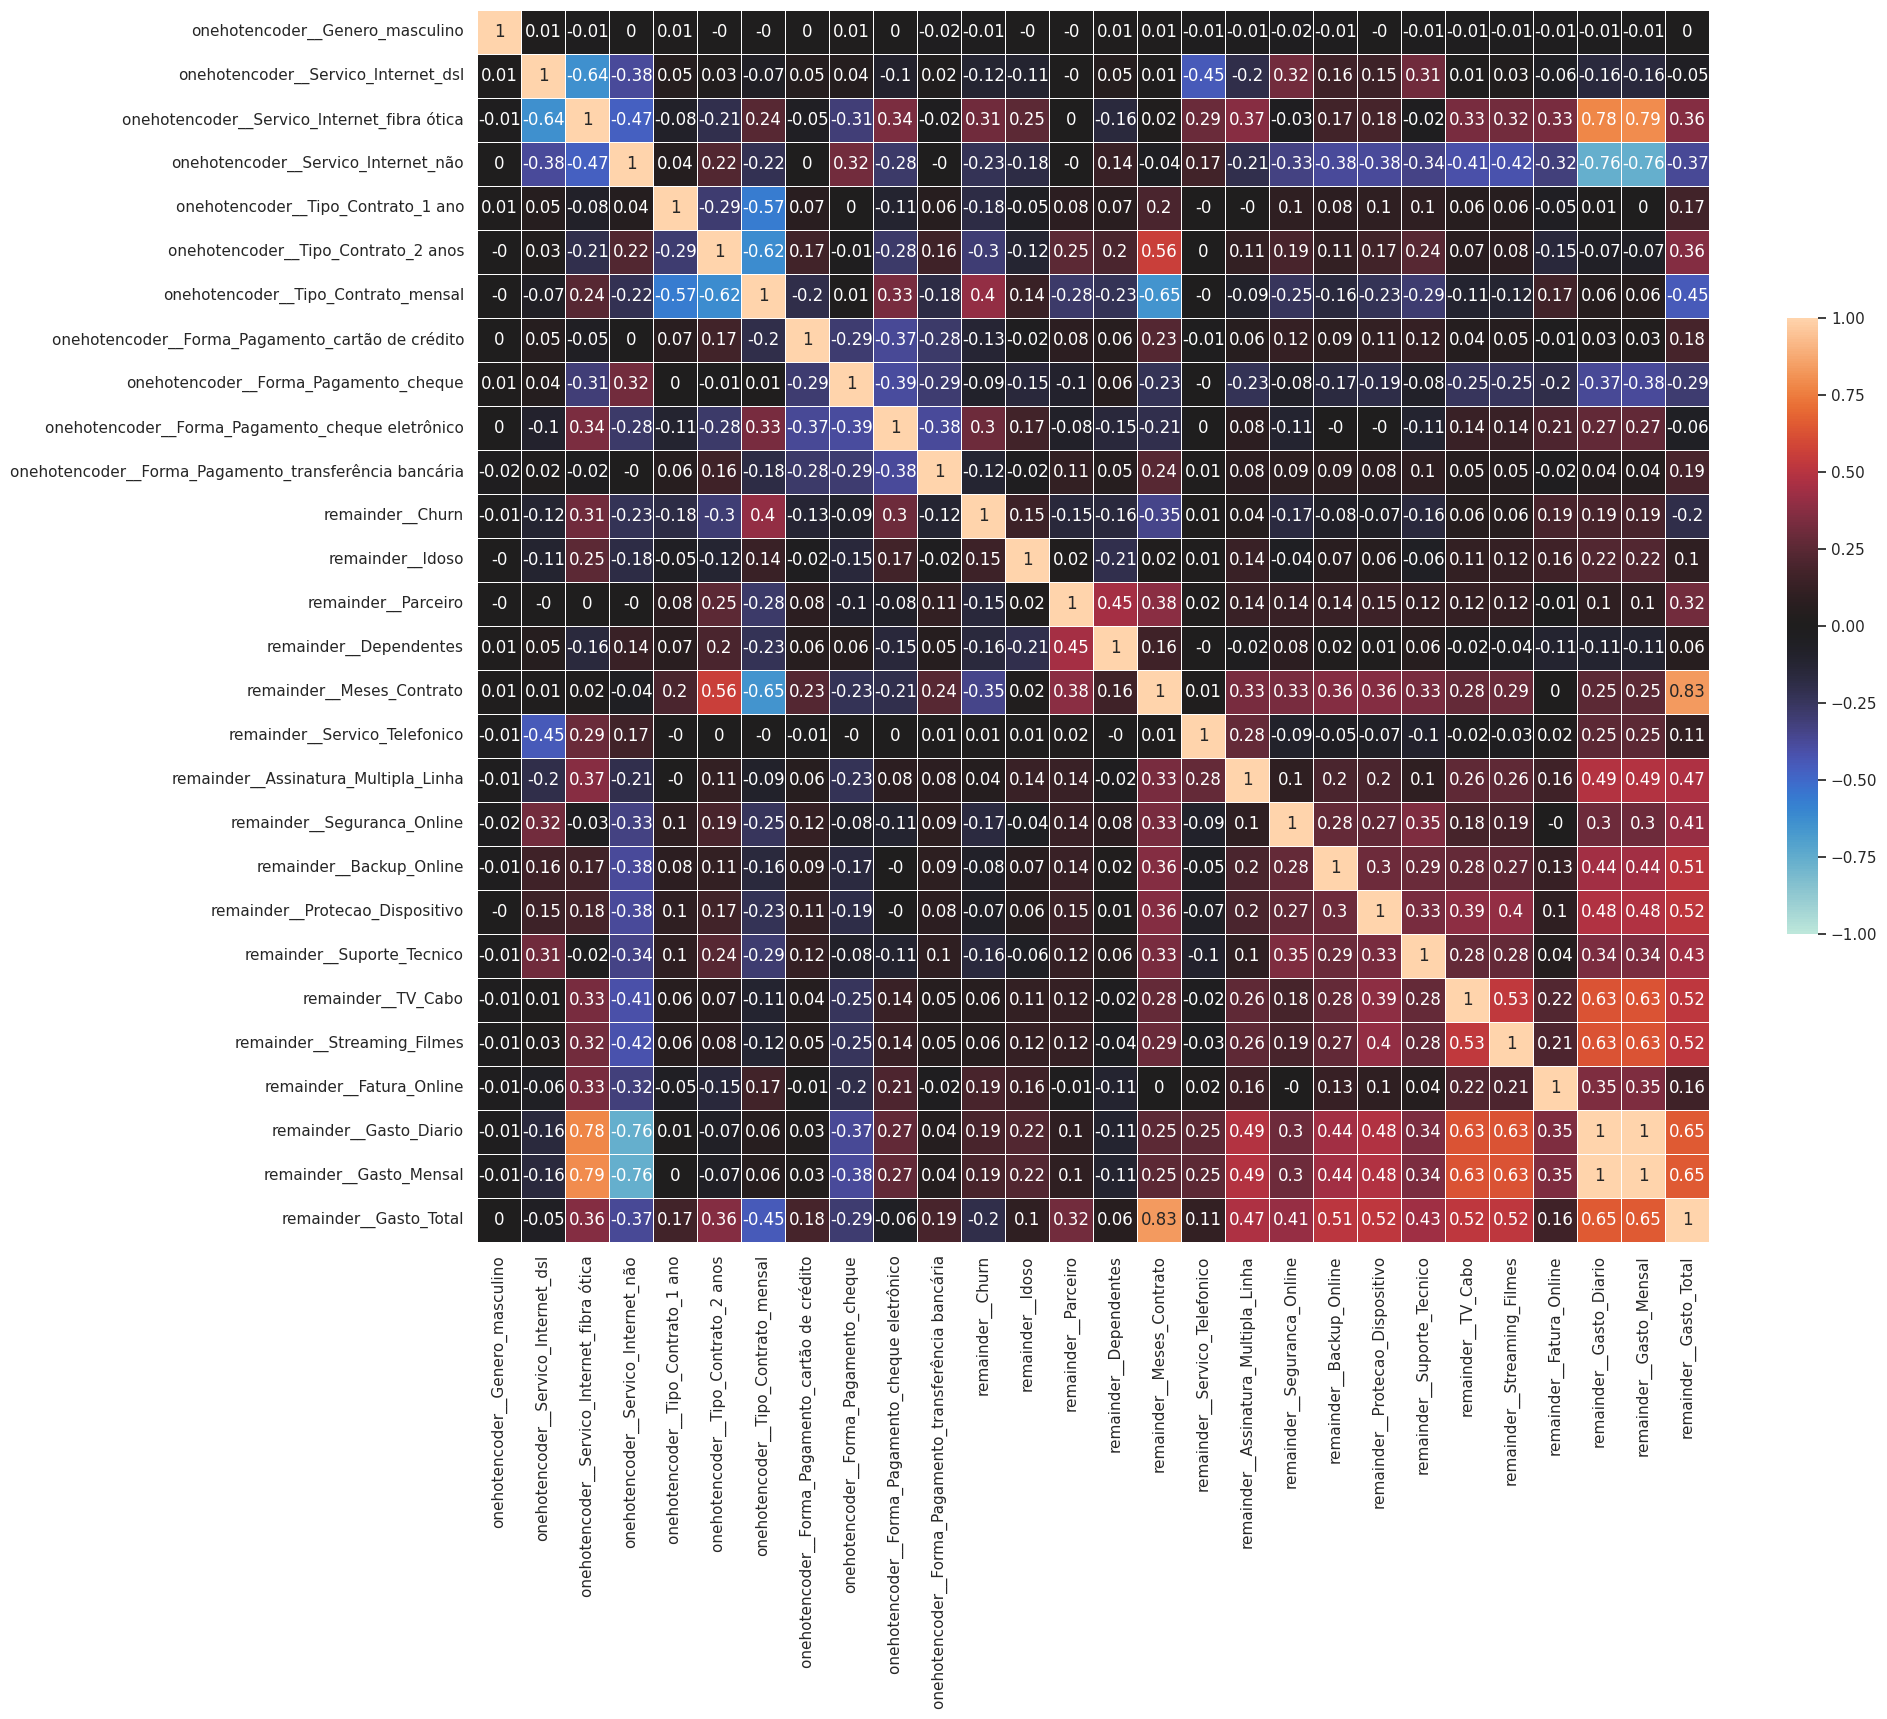

In [112]:
# Cria uma figura e um eixo (ax) para o gráfico, definindo o tamanho (20x16 polegadas).
fig, ax = plt.subplots(figsize=(20,16))

# Gera o mapa de calor da matriz de correlação.
ax = sns.heatmap(np.round(corr, 2),             # Arredonda os valores da matriz de correlação para 2 casas decimais.
                 vmax=1,                        # Define o valor máximo da escala de cores como 1 (correlação perfeita positiva).
                 vmin=-1,                       # Define o valor mínimo da escala como -1 (correlação perfeita negativa).
                 center=0,                      # Centraliza a escala em 0 (sem correlação).
                 square=True,                   # Mantém as células quadradas para melhor visualização.
                 linewidths=.5,                 # Define a espessura das linhas que separam as células.
                 annot=True,                    # Exibe os valores numéricos dentro de cada célula.
                 cbar_kws={"shrink": .5})       # Ajusta o tamanho da barra de cores (colormap) para 50%.

# Exibe o gráfico gerado.
plt.show()

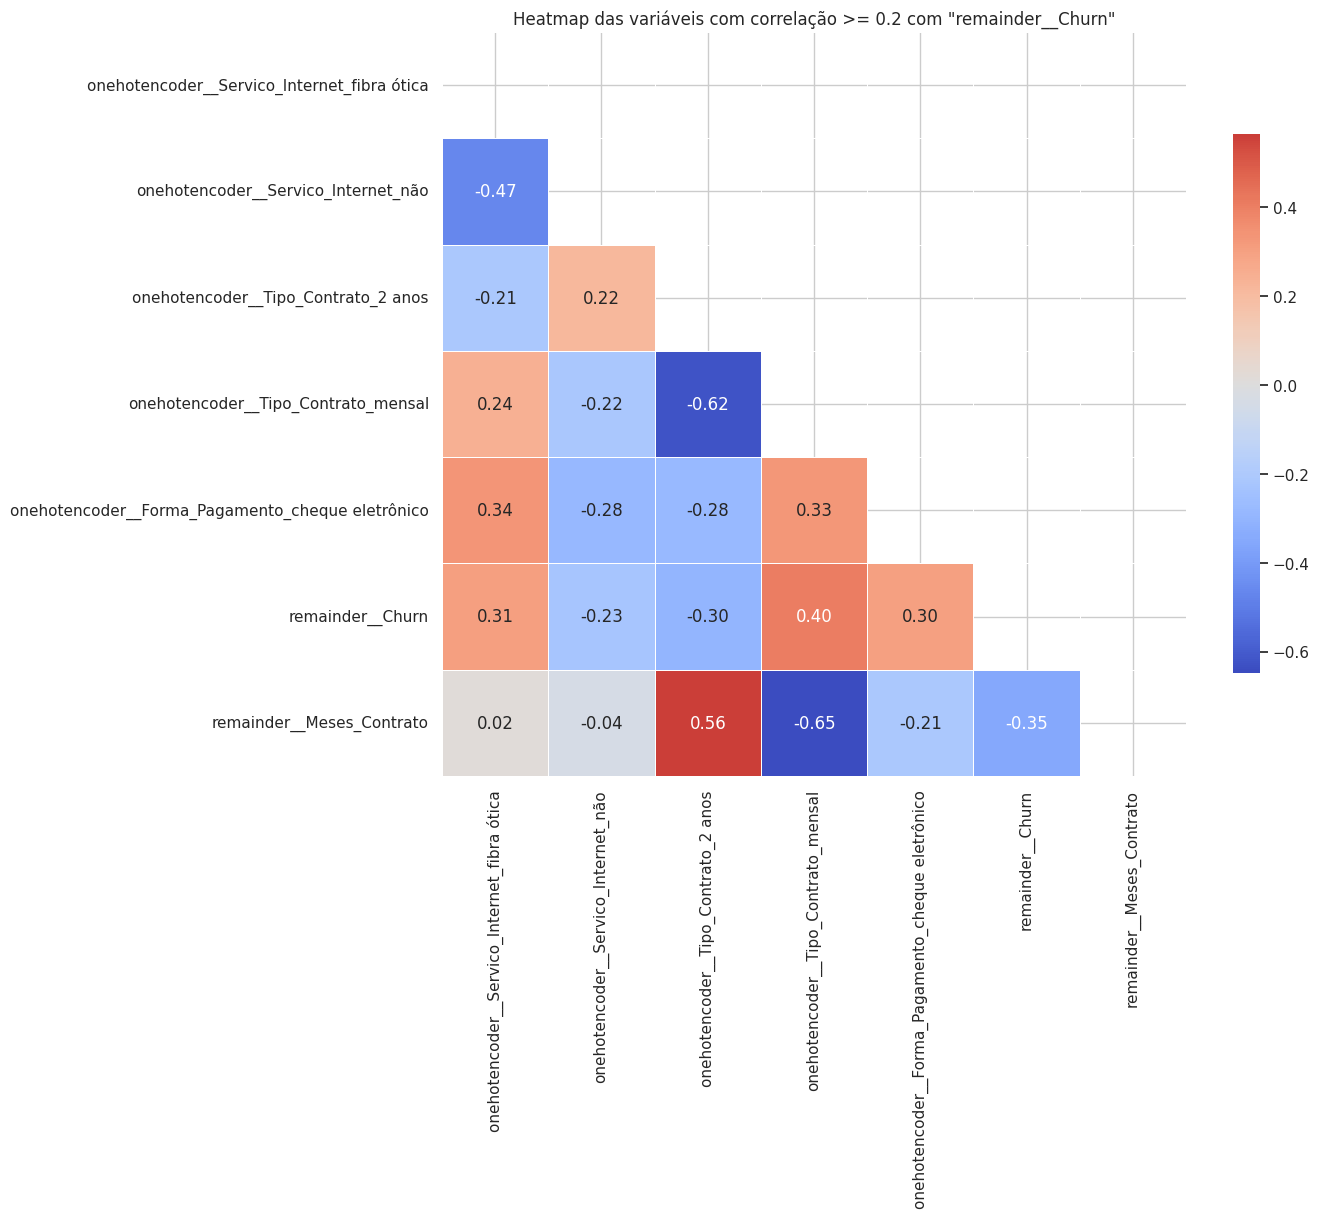

In [113]:
# Definir a variável alvo
target_var = 'remainder__Churn'

# Definir o limiar mínimo de correlação absoluta para seleção
limiar = 0.2

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
# Isso cria uma lista com as variáveis relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

## Análises Direcionadas

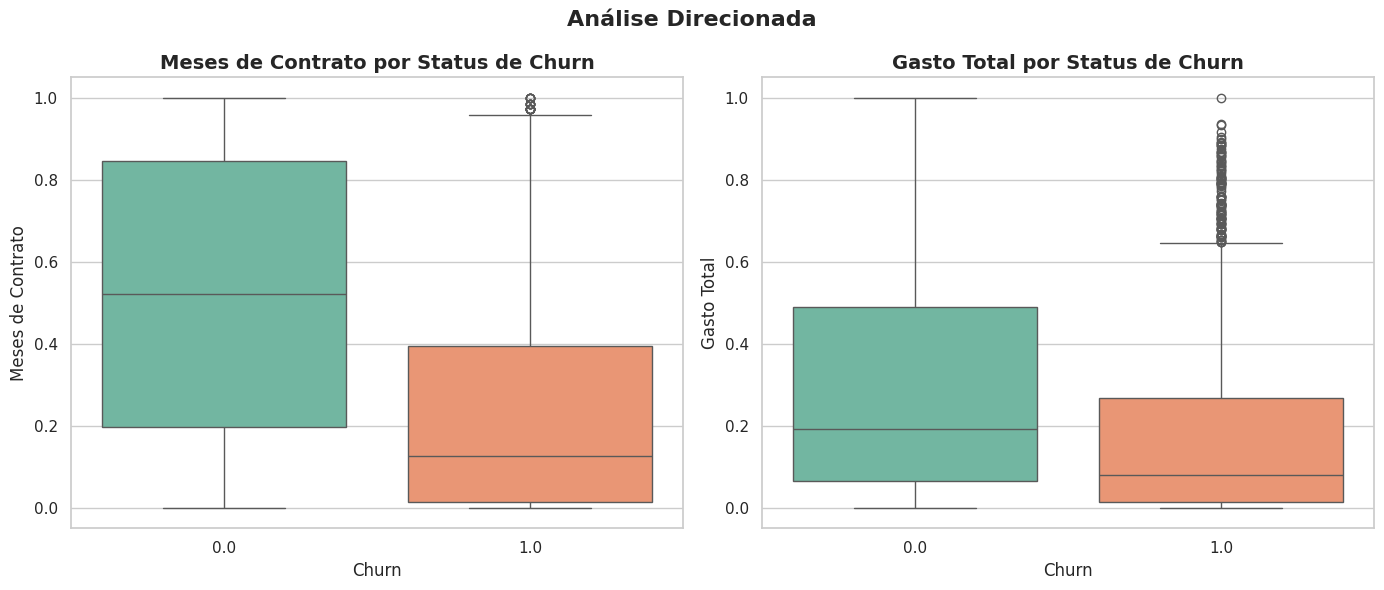

In [114]:
# Define o estilo
sns.set(style="whitegrid")

# Cria a figura com 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Análise Direcionada', fontsize=16, fontweight='bold')

# --- Gráfico 1: Meses de Contrato ---
sns.boxplot(
    x='remainder__Churn',
    y='remainder__Meses_Contrato',
    data=dados_encoded,
    hue = 'remainder__Churn',
    legend = False,
    palette="Set2",
    ax=axes[0]  # define o primeiro eixo
)
axes[0].set_title("Meses de Contrato por Status de Churn", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Churn", fontsize=12)
axes[0].set_ylabel("Meses de Contrato", fontsize=12)

# --- Gráfico 2: Gasto Total ---
sns.boxplot(
    x='remainder__Churn',
    y='remainder__Gasto_Total',
    data=dados_encoded,
    hue = 'remainder__Churn',
    legend = False,
    palette="Set2",
    ax=axes[1]  # define o segundo eixo
)
axes[1].set_title("Gasto Total por Status de Churn", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Churn", fontsize=12)
axes[1].set_ylabel("Gasto Total", fontsize=12)

# Ajusta o layout para não sobrepor títulos
plt.tight_layout()
plt.show()



#🤖 Modelagem Preditiva

## Separação de Dados de Treino e Teste

Vamos dividir os dados em conjuntos de treino e teste para preparar a modelagem preditiva. Utilizaremos 70% dos dados para treino e 30% para teste.

In [115]:
# Importa a função train_test_split da biblioteca scikit-learn.
# Essa função é usada para dividir os dados em conjuntos de treinamento e teste.
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
                                                      X_balanced,
                                                      y_balanced,
                                                      test_size=0.3,
                                                      random_state=42,
                                                      stratify=y_balanced
                                                    )

## Criação de Modelos

In [119]:
# Importa a classe LogisticRegression do módulo sklearn.linear_model.
# Esse modelo é usado para problemas de classificação binária ou multiclasse,
# sendo bastante aplicado em churn, detecção de fraudes e análise de risco.
# Ele estima a probabilidade de ocorrência de um evento com base em variáveis independentes.
from sklearn.linear_model import LogisticRegression

# Importa a classe RandomForestClassifier do módulo sklearn.ensemble.
# Esse modelo é baseado em um conjunto (ensemble) de árvores de decisão.
# Funciona criando várias árvores durante o treinamento e usando a votação da maioria para classificar.
# É robusto contra overfitting, lida bem com variáveis categóricas/numericas
# e geralmente apresenta boa acurácia em diversos tipos de dados.
from sklearn.ensemble import RandomForestClassifier

**Regressão Logística**

In [120]:
# Instanciar e treinar
modelo_regressao_logistica = LogisticRegression()
modelo_regressao_logistica.fit(X_train, y_train)

LogisticRegression()

**Random Forest**

In [121]:
# Instanciar e treinar
modelo_random_forest = RandomForestClassifier()
modelo_random_forest.fit(X_train, y_train)

RandomForestClassifier()

## Avaliação dos Modelos

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Importa diferentes métricas de avaliação de modelos da biblioteca scikit-learn:

# accuracy_score → Calcula a acurácia do modelo, ou seja,
# a proporção de previsões corretas em relação ao total de previsões feitas.

# confusion_matrix → Retorna a matriz de confusão, que mostra:
# - Verdadeiros Positivos (VP)
# - Verdadeiros Negativos (VN)
# - Falsos Positivos (FP)
# - Falsos Negativos (FN)
# É muito útil para entender como o modelo erra em cada classe.

# classification_report → Gera um relatório completo com métricas por classe:
# - Precision (precisão): acertos sobre os classificados como positivos.
# - Recall (sensibilidade): acertos sobre os realmente positivos.
# - F1-score: média harmônica entre precisão e recall.
# - Support: quantidade de ocorrências reais de cada classe.

# roc_auc_score → Calcula a métrica AUC (Area Under the Curve) da curva ROC.
# Mede a capacidade do modelo em separar as classes em diferentes limiares de decisão.
# É especialmente importante em cenários de desequilíbrio de classes (como churn).

**Regressão Logística**

In [125]:
# Previsões
y_pred_modelo_regressao_logistica = modelo_regressao_logistica.predict(X_test)
y_prob_modelo_regressao_logistica = modelo_regressao_logistica.predict_proba(X_test)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_modelo_regressao_logistica))
print("ROC AUC:", roc_auc_score(y_test, y_prob_modelo_regressao_logistica))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_modelo_regressao_logistica))
print(classification_report(y_test, y_pred_modelo_regressao_logistica))

Regressão Logística
Acurácia: 0.7717882504841833
ROC AUC: 0.8536934843321313
Matriz de Confusão:
 [[1130  419]
 [ 288 1261]]
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      1549
         1.0       0.75      0.81      0.78      1549

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



**Random Forest**

In [126]:
# Previsões
y_pred_modelo_random_forest = modelo_random_forest.predict(X_test)
y_prob_modelo_random_forest = modelo_random_forest.predict_proba(X_test)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_modelo_random_forest))
print("ROC AUC:", roc_auc_score(y_test, y_prob_modelo_random_forest))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_modelo_random_forest))
print(classification_report(y_test, y_pred_modelo_random_forest))

Random Forest
Acurácia: 0.8389283408650743
ROC AUC: 0.9199320997198883
Matriz de Confusão:
 [[1259  290]
 [ 209 1340]]
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83      1549
         1.0       0.82      0.87      0.84      1549

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



## Análise Crítica e Comparação dos Modelos

Baseado nas métricas de avaliação fornecidas para os modelos de Regressão Logística e Random Forest, segue uma análise crítica e comparativa:

**Comparativo de Desempenho:**

*   **Acurácia:** O modelo Random Forest (`0.8389`) apresentou uma acurácia maior do que o modelo de Regressão Logística (`0.7718`). Isso significa que o Random Forest classificou corretamente uma proporção maior de clientes no conjunto de teste.
*   **ROC AUC:** O Random Forest (`0.9199`) também obteve um valor de ROC AUC significativamente maior do que a Regressão Logística (`0.8537`). O ROC AUC é uma métrica importante para problemas de classificação desbalanceada, pois avalia a capacidade do modelo de distinguir entre as classes. Um valor mais alto indica uma melhor performance na separação das classes.
*   **Matriz de Confusão e Classification Report:**
    *   **Random Forest:** Apresentou um número menor de Falsos Positivos (clientes que não evadiram, mas foram previstos como evasão - 290) e Falsos Negativos (clientes que evadiram, mas foram previstos como não evasão - 209) em comparação com a Regressão Logística (419 Falsos Positivos e 288 Falsos Negativos). Isso se reflete nas métricas de Precision, Recall e F1-score, onde o Random Forest geralmente outperformed a Regressão Logística para ambas as classes (0.0 e 1.0).
    *   **Regressão Logística:** Embora tenha um desempenho razoável, a Regressão Logística teve mais dificuldade em acertar as previsões, especialmente na identificação correta dos clientes que evadiram (Recall de 0.81 para Churn=1.0, comparado a 0.87 do Random Forest).

**Conclusão de Desempenho:**

Com base nas métricas avaliadas, o modelo **Random Forest teve um desempenho superior** ao modelo de Regressão Logística neste conjunto de dados para a tarefa de previsão de churn. Ele demonstrou melhor capacidade de classificação geral (acurácia) e maior poder de discriminação entre as classes (ROC AUC), além de cometer menos erros de classificação (Falsos Positivos e Falsos Negativos).

**Overfitting ou Underfitting:**

Para avaliar overfitting ou underfitting, precisaríamos comparar o desempenho dos modelos nos conjuntos de treino e teste. No entanto, você apenas forneceu as métricas de avaliação para o conjunto de teste.

*   Se a **acurácia (ou outras métricas) no conjunto de treino for significativamente mais alta do que no conjunto de teste**, isso seria um forte indício de **overfitting**. O modelo aprendeu muito bem os padrões específicos dos dados de treino, mas não consegue generalizar para novos dados.
*   Se a **acurácia (ou outras métricas) for baixa tanto no conjunto de treino quanto no conjunto de teste**, isso pode indicar **underfitting**. O modelo é muito simples e não está capturando as complexidades dos dados.

**Considerando os resultados no conjunto de teste:**

*   O Random Forest teve um desempenho bom no conjunto de teste (Acurácia de 0.8389 e ROC AUC de 0.9199). Isso sugere que ele não está sofrendo de underfitting severo. Para verificar overfitting, seria necessário avaliar seu desempenho no conjunto de treino. Se a acurácia no treino fosse próxima de 1.0, mas no teste fosse 0.8389, poderíamos considerar ajustar os hiperparâmetros do Random Forest para reduzir a complexidade (por exemplo, limitar a profundidade das árvores, aumentar o número mínimo de amostras por folha).
*   A Regressão Logística teve um desempenho inferior (Acurácia de 0.7718 e ROC AUC de 0.8537). Embora não pareça estar subajustada (underfitting) de forma drástica, há espaço significativo para melhoria. Se o desempenho no treino também fosse similarmente baixo, isso reforçaria a hipótese de que a Regressão Logística, por ser um modelo linear, pode ser muito simples para capturar as relações complexas neste dataset. Nesse caso, aumentar a complexidade do modelo (como o Random Forest, que você já testou e teve melhor performance) ou explorar outros algoritmos mais complexos seria uma opção.

**Possíveis Causas e Ajustes (Baseado nos resultados do Teste e conhecimento geral dos modelos):**

*   **Random Forest (Potencial Overfitting - precisa verificar no treino):**
    *   **Causa:** O Random Forest, por ser um modelo baseado em árvores, pode se ajustar demais aos dados de treino se não houver restrições em sua complexidade.
    *   **Ajustes:**
        *   **Regularização:** Ajustar hiperparâmetros como `max_depth` (profundidade máxima das árvores), `min_samples_leaf` (número mínimo de amostras em uma folha) ou `min_samples_split` (número mínimo de amostras para dividir um nó).
        *   **Mais Dados:** Se possível, obter mais dados de treino pode ajudar o modelo a generalizar melhor.
*   **Regressão Logística (Potencial Underfitting):**
    *   **Causa:** A Regressão Logística assume uma relação linear entre as variáveis de entrada e a probabilidade da classe. Se as relações nos dados forem não lineares, um modelo linear pode não capturá-las adequadamente.
    *   **Ajustes:**
        *   **Feature Engineering:** Criar novas features que capturem interações não lineares ou padrões mais complexos nos dados.
        *   **Modelos Mais Complexos:** Utilizar modelos mais poderosos e capazes de capturar não linearidades, como Árvores de Decisão, Random Forest (que já se mostrou melhor), Gradient Boosting (XGBoost, LightGBM), ou Redes Neurais.

Em resumo, o Random Forest é o modelo mais promissor até agora. Para ter certeza sobre overfitting, seria importante avaliar o desempenho de ambos os modelos no conjunto de treino. Se o Random Forest estiver overfitando, ajustar seus hiperparâmetros seria o próximo passo. Se a Regressão Logística estiver underfitando (verificando o desempenho no treino), explorar modelos mais complexos ou engenharia de features seria recomendado.

#📋  Interpretação e Conclusões

## Análise de Importância das Variáveis

In [127]:
# --- Regressão Logística ---
# Obtém os coeficientes do modelo de Regressão Logística
coeficientes_reg_logistica = pd.Series(modelo_regressao_logistica.coef_[0], index=X_train.columns)

# Ordena os coeficientes pelo valor absoluto para ver as variáveis mais importantes
coeficientes_reg_logistica_ordenados = coeficientes_reg_logistica.abs().sort_values(ascending=False)

print("Importância das Variáveis (Coeficientes Absolutos) - Regressão Logística:")
print(coeficientes_reg_logistica_ordenados)

# --- Random Forest ---
# Obtém a importância das variáveis do modelo Random Forest
importancia_random_forest = pd.Series(modelo_random_forest.feature_importances_, index=X_train.columns)

# Ordena a importância das variáveis
importancia_random_forest_ordenada = importancia_random_forest.sort_values(ascending=False)

print("\nImportância das Variáveis - Random Forest:")
print(importancia_random_forest_ordenada)

Importância das Variáveis (Coeficientes Absolutos) - Regressão Logística:
remainder__Meses_Contrato                                3.494465
remainder__Gasto_Total                                   1.951794
onehotencoder__Tipo_Contrato_mensal                      0.684130
onehotencoder__Servico_Internet_fibra ótica              0.665403
onehotencoder__Servico_Internet_não                      0.656374
onehotencoder__Tipo_Contrato_2 anos                      0.503595
remainder__Seguranca_Online                              0.476234
remainder__Suporte_Tecnico                               0.444057
remainder__Servico_Telefonico                            0.399667
remainder__Gasto_Diario                                  0.391880
remainder__Fatura_Online                                 0.343112
onehotencoder__Forma_Pagamento_cheque eletrônico         0.294192
remainder__Dependentes                                   0.210413
remainder__Idoso                                         0.197581
re

### Interpretação da Importância das Variáveis

Aqui está a análise da importância das variáveis para prever a evasão com base nos modelos de Regressão Logística e Random Forest:

**Regressão Logística (Baseado nos Coeficientes):**

Os coeficientes da Regressão Logística indicam a magnitude e a direção do impacto de cada variável na probabilidade de evasão. Um coeficiente positivo alto sugere que a variável aumenta a probabilidade de churn, enquanto um coeficiente negativo alto sugere que a variável diminui essa probabilidade. A magnitude do coeficiente indica a força da relação.

Analisando os coeficientes ordenados pelo valor absoluto, as variáveis mais relevantes para a Regressão Logística são aquelas com os maiores coeficientes (positivos ou negativos). Isso significa que mudanças nessas variáveis têm o maior impacto na previsão de churn pelo modelo.

**Random Forest (Baseado na Importância das Features):**

A importância das variáveis no Random Forest é calculada com base em quanto cada variável contribui para a redução da impureza (por exemplo, Gini impurity) nas divisões das árvores. Variáveis que resultam em divisões mais "puras" (onde as amostras de uma classe são separadas de forma mais eficaz) recebem maior importância. Essa métrica reflete o quanto a variável é útil, em média, para fazer previsões precisas em todo o conjunto de árvores.

Analisando a importância das variáveis ordenadas, as variáveis com os maiores valores são consideradas as mais importantes pelo modelo Random Forest na tarefa de classificar clientes como churn ou não churn.

**Comparativo e Insights:**

Comparando as listas de importância de ambos os modelos, podemos identificar variáveis que são consistentemente importantes em ambos, bem como variáveis que podem ser mais relevantes para um modelo do que para outro.

*   Variáveis com alta importância em ambos os modelos são fortes indicadores de churn.
*   Diferenças na lista de importância podem refletir como cada algoritmo modela as relações nos dados (linearidade na Regressão Logística vs. não linearidade no Random Forest).

Esta análise nos ajuda a entender quais características dos clientes são os principais motores da evasão, fornecendo insights valiosos para ações de retenção.

**Conclusões sobre as Variáveis Mais Relevantes:**

Com base nos resultados dos coeficientes da Regressão Logística e da importância das features do Random Forest, podemos inferir as variáveis que mais influenciam a previsão de churn. (Esta seção será preenchida com as variáveis específicas após a execução do código e análise dos resultados).

## Conclusão

### Relatório Detalhado sobre a Evasão de Clientes

Este relatório apresenta uma análise dos fatores que mais influenciam a evasão de clientes (churn) com base nos dados fornecidos, utilizando modelos de Regressão Logística e Random Forest.

### Resumo do Projeto

O objetivo deste projeto foi prever a evasão de clientes e identificar os principais fatores associados a esse comportamento. Realizamos etapas de preparação dos dados, análise exploratória, balanceamento de classes e modelagem preditiva com dois algoritmos distintos.

### Análise de Desempenho dos Modelos

Avaliamos o desempenho dos modelos de Regressão Logística e Random Forest no conjunto de teste usando métricas como Acurácia, ROC AUC, Matriz de Confusão e Classification Report.

*   **Regressão Logística:** Apresentou uma acurácia de **0.7718** e um ROC AUC de **0.8537**. O modelo demonstrou uma capacidade razoável de prever a evasão, mas cometeu um número considerável de Falsos Positivos e Falsos Negativos.
*   **Random Forest:** Obteve um desempenho superior, com acurácia de **0.8389** e ROC AUC de **0.9199**. Este modelo foi mais eficaz em classificar corretamente os clientes e demonstrou um maior poder de discriminação entre as classes de churn e não-churn.

**Conclusão de Desempenho:** O modelo **Random Forest** foi o que melhor se ajustou aos dados e demonstrou maior capacidade preditiva para identificar clientes propensos à evasão.

### Fatores que Mais Influenciam a Evasão (Baseado na Importância das Variáveis)

A análise da importância das variáveis nos modelos revelou os seguintes fatores como os mais relevantes para a previsão de churn:

*   **Meses de Contrato (`remainder__Meses_Contrato`):** Esta variável consistentemente apareceu como uma das mais importantes em ambos os modelos. Clientes com contratos de menor duração tendem a ter uma maior probabilidade de evasão. Isso é claramente visível no boxplot de "Meses de Contrato por Status de Churn", onde a mediana de meses de contrato para clientes que evadiram é significativamente menor do que para clientes que não evadiram.
*   **Gasto Total (`remainder__Gasto_Total`), Gasto Mensal (`remainder__Gasto_Mensal`), Gasto Diário (`remainder__Gasto_Diario`):** As variáveis relacionadas a gastos também se mostraram importantes, especialmente no modelo Random Forest. Embora a correlação com o churn possa variar (o gasto total tem uma correlação negativa, enquanto o gasto diário e mensal têm correlação positiva), a magnitude da influência dessas variáveis nos modelos indica que o padrão de gastos é um forte preditor de evasão. O boxplot de "Gasto Total por Status de Churn" corrobora isso, mostrando que clientes com menor gasto total têm maior propensão a evadir.
*   **Tipo de Contrato (`onehotencoder__Tipo_Contrato_mensal`, `onehotencoder__Tipo_Contrato_2 anos`):** O tipo de contrato é um fator crucial. Clientes com contrato **mensal** apresentam uma correlação positiva forte com churn, enquanto contratos de **2 anos** têm uma correlação negativa significativa. Isso sugere que contratos de longo prazo aumentam a fidelidade do cliente.
*   **Serviço de Internet (`onehotencoder__Servico_Internet_fibra ótica`, `onehotencoder__Servico_Internet_não`):** O tipo de serviço de internet também é relevante. Clientes com serviço de **fibra ótica** tendem a ter maior probabilidade de evasão (correlação positiva), enquanto aqueles que **não possuem** serviço de internet pela empresa têm menor probabilidade de evadir (correlação negativa). Isso pode indicar problemas com a qualidade ou custo do serviço de fibra ótica.
*   **Forma de Pagamento (`onehotencoder__Forma_Pagamento_cheque eletrônico`):** Clientes que utilizam **cheque eletrônico** como forma de pagamento parecem ter uma maior propensão à evasão.
*   **Segurança Online (`remainder__Seguranca_Online`) e Suporte Técnico (`remainder__Suporte_Tecnico`):** A ausência de serviços como segurança online e suporte técnico está associada a uma maior probabilidade de churn (correlação negativa, indicando que ter o serviço diminui a probabilidade de churn).

### Principais Fatores de Evasão Identificados

Com base na análise, os principais fatores que impulsionam a evasão de clientes são:

1.  **Curta Duração do Contrato:** Clientes com contratos de curto prazo são mais propensos a sair.
2.  **Padrão de Gastos:** Clientes com menor gasto total e possivelmente padrões de gasto diário/mensal específicos são mais vulneráveis à evasão.
3.  **Tipo de Contrato:** Contratos mensais são um forte indicador de churn, enquanto contratos de 2 anos promovem a retenção.
4.  **Serviço de Internet (Fibra Ótica):** Clientes de fibra ótica parecem mais propensos a evadir, o que pode indicar insatisfação com o serviço.
5.  **Forma de Pagamento (Cheque Eletrônico):** Esta forma de pagamento está associada a uma maior probabilidade de churn.
6.  **Falta de Serviços Adicionais:** Clientes que não utilizam serviços como segurança online e suporte técnico têm maior risco de evasão.

### Estratégias de Retenção Propostas

Com base nos fatores identificados, sugerimos as seguintes estratégias de retenção:

*   **Incentivar Contratos de Longo Prazo:** Oferecer descontos, benefícios ou promoções exclusivas para clientes que optarem por contratos de 1 ou 2 anos.
*   **Monitorar Clientes com Contratos Curtos:** Implementar programas de engajamento e contato proativo para clientes com contratos mensais, buscando entender suas necessidades e oferecer soluções para mantê-los.
*   **Analisar o Serviço de Fibra Ótica:** Investigar as possíveis causas de insatisfação entre clientes de fibra ótica. Isso pode envolver pesquisas de satisfação, melhorias na qualidade do serviço ou ajustes nos preços.
*   **Oferecer Pacotes de Serviços:** Promover a adesão a serviços adicionais como segurança online e suporte técnico, destacando seus benefícios e como eles agregam valor ao cliente. Isso pode ser feito através de ofertas combinadas ou períodos de teste gratuitos.
*   **Analisar o Comportamento de Pagamento:** Investigar por que clientes que usam cheque eletrônico têm maior propensão à evasão. Pode haver problemas com o processo de pagamento ou insatisfação relacionada a ele.
*   **Programas de Fidelidade:** Criar programas de fidelidade baseados no tempo de contrato e gastos, recompensando clientes de longo prazo e alto valor.
*   **Comunicação Personalizada:** Utilizar os insights sobre os fatores de churn para personalizar a comunicação com os clientes, oferecendo soluções relevantes para suas necessidades e preocupações específicas.

### Próximos Passos

Para aprimorar a capacidade de previsão de churn, os próximos passos podem incluir:

*   **Ajuste de Hiperparâmetros:** Otimizar os hiperparâmetros do modelo Random Forest para potencialmente melhorar ainda mais seu desempenho e mitigar o risco de overfitting.
*   **Exploração de Outros Modelos:** Testar outros algoritmos de classificação, como Gradient Boosting (XGBoost, LightGBM) ou Redes Neurais, que podem capturar padrões complexos nos dados.
*   **Engenharia de Features Adicionais:** Criar novas variáveis que possam extrair mais informações dos dados existentes e melhorar o poder preditivo dos modelos.
*   **Validação Cruzada:** Utilizar técnicas de validação cruzada para obter uma estimativa mais robusta do desempenho do modelo.

Este relatório fornece uma base sólida para entender os principais impulsionadores da evasão de clientes e propor ações estratégicas para a retenção. A implementação e o monitoramento contínuo dessas estratégias são essenciais para reduzir o churn e aumentar a fidelidade do cliente.